In [1]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Connect to database
data_folder = Path("../data")
db_path = data_folder / "el_bagel.db"

conn = sqlite3.connect(db_path)

# Load sales data into a pandas DataFrame
df = pd.read_sql_query("SELECT * FROM daily_sales", conn)

print(f"Loaded {len(df)} rows")
df.head()

Matplotlib is building the font cache; this may take a moment.


Loaded 6 rows


,id,date,location,bagel_type,quantity_sold,quantity_made,revenue,created_at
0,1,2024-12-01,biscayne,plain,45,50,157.5,2025-12-19 17:57:44
1,2,2024-12-01,biscayne,everything,62,70,217.0,2025-12-19 17:57:44
2,3,2024-12-01,biscayne,sesame,28,35,98.0,2025-12-19 17:57:44
3,4,2024-12-02,biscayne,plain,51,55,178.5,2025-12-19 17:57:44
4,5,2024-12-02,biscayne,everything,58,65,203.0,2025-12-19 17:57:44


In [2]:
# Basic statistics
print("Summary of quantity_sold:")
print(df['quantity_sold'].describe())

print("\nSales by bagel type:")
print(df.groupby('bagel_type')['quantity_sold'].sum())

Summary of quantity_sold:
count     6.000000
mean     45.833333
std      13.963046
min      28.000000
25%      34.500000
50%      48.000000
75%      56.250000
max      62.000000
Name: quantity_sold, dtype: float64

Sales by bagel type:
bagel_type
everything    120
plain          96
sesame         59
Name: quantity_sold, dtype: int64


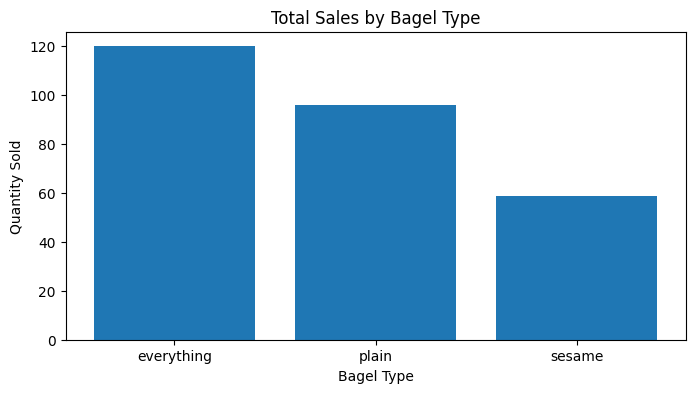

In [3]:
# Simple bar chart of sales by bagel type
sales_by_type = df.groupby('bagel_type')['quantity_sold'].sum()

plt.figure(figsize=(8, 4))
plt.bar(sales_by_type.index, sales_by_type.values)
plt.title('Total Sales by Bagel Type')
plt.xlabel('Bagel Type')
plt.ylabel('Quantity Sold')
plt.show()

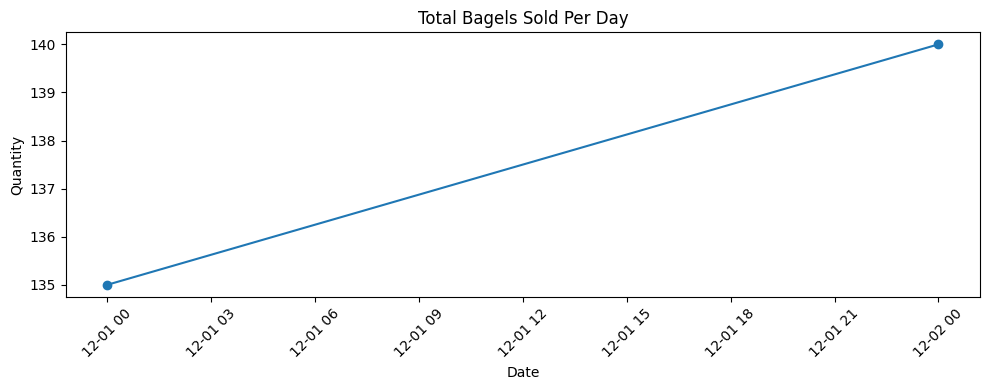

In [4]:
# Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Sales over time (total per day)
daily_totals = df.groupby('date')['quantity_sold'].sum()

plt.figure(figsize=(10, 4))
plt.plot(daily_totals.index, daily_totals.values, marker='o')
plt.title('Total Bagels Sold Per Day')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()